In [68]:
import numpy as np
import pandas as pd
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors
from sklearn.preprocessing import StandardScaler

In [69]:
df_train = pd.read_csv("SOM_project/data/training.zip", compression='zip')

df_train_background = df_train[df_train.Label == 'b']
#print(df_train.shape)
#data =df_train.iloc[:50000,]
#print(data.head())
df_train = df_train_background
df_train['Label'].replace({'s': 1, 'b': 0}, inplace=True)
X1 = df_train.drop(['EventId','Label','Weight'], axis=1).astype(float)
X = np.array(df_train.drop(['EventId','Label','Weight'], axis=1).astype(float))
y = np.array(df_train['Label'])
#X=X[:50000,:]
y=y[:50000]
X.shape

(164333, 30)

TypeError: 'Index' object is not callable

In [70]:
train_x=X

#train_x, test_x, train_y, test_y = train_test_split(features, y, test_size=0.2, random_state=42)


In [71]:
# Data Normalization
def minmax_scaler(data):
    #scaler = StandardScaler()
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled



# Manhattan distance
def m_distance(x, y):
    return distance.cityblock(x, y)

# Euclidean distance
def e_distance(x, y):
    return distance.euclidean(x, y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
    winner = [0, 0]
    shortest_distance = np.sqrt(data.shape[1])  # initialize with max distance
    input_data = data[t]
    for row in range(num_rows):
        for col in range(num_cols):
            distance = e_distance(som[row][col], data[t])
            if distance < shortest_distance: 
                shortest_distance = distance
                winner = [row, col]
    return winner

# Learning rate and neighborhood range calculation
def decay(step, max_steps, max_learning_rate, max_m_distance):
    coefficient = 1.0 - (np.float64(step) / max_steps)
    learning_rate = coefficient * max_learning_rate
    neighborhood_range = ceil(coefficient * max_m_distance)
    return learning_rate, neighborhood_range


In [72]:
# hyperparameters
num_rows = 50
num_cols = 50
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(10*10e3)

In [73]:
train_x_norm = minmax_scaler(train_x)  # normalization


num_dims = train_x_norm.shape[1]  # number of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims))  # map construction

for step in range(max_steps):
    if (step + 1) % 1000 == 0:
        print("Iteration:", step + 1)  # print out the current iteration for every 1k
    learning_rate, neighbourhood_range = decay(step, max_steps, max_learning_rate, max_m_dsitance)

    t = np.random.randint(0, high=train_x_norm.shape[0])  # random index of training data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    for row in range(num_rows):
        for col in range(num_cols):
            if m_distance([row, col], winner) <= neighbourhood_range:
                som[row][col] += learning_rate * (train_x_norm[t] - som[row][col])  # update neighbor's weight

print("SOM training completed")


Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000
Iteration: 5000
Iteration: 6000
Iteration: 7000
Iteration: 8000
Iteration: 9000
Iteration: 10000
Iteration: 11000
Iteration: 12000
Iteration: 13000
Iteration: 14000
Iteration: 15000
Iteration: 16000
Iteration: 17000
Iteration: 18000
Iteration: 19000
Iteration: 20000
Iteration: 21000
Iteration: 22000
Iteration: 23000
Iteration: 24000
Iteration: 25000
Iteration: 26000
Iteration: 27000
Iteration: 28000
Iteration: 29000
Iteration: 30000
Iteration: 31000
Iteration: 32000
Iteration: 33000
Iteration: 34000
Iteration: 35000
Iteration: 36000
Iteration: 37000
Iteration: 38000
Iteration: 39000
Iteration: 40000
Iteration: 41000
Iteration: 42000
Iteration: 43000
Iteration: 44000
Iteration: 45000
Iteration: 46000
Iteration: 47000
Iteration: 48000
Iteration: 49000
Iteration: 50000
Iteration: 51000
Iteration: 52000
Iteration: 53000
Iteration: 54000
Iteration: 55000
Iteration: 56000
Iteration: 57000
Iteration: 58000
Iteration: 59000
Iterat

In [74]:
som0 = som[:,:,0]
som0.shape

(50, 50)

Text(0.5, 1.0, '')

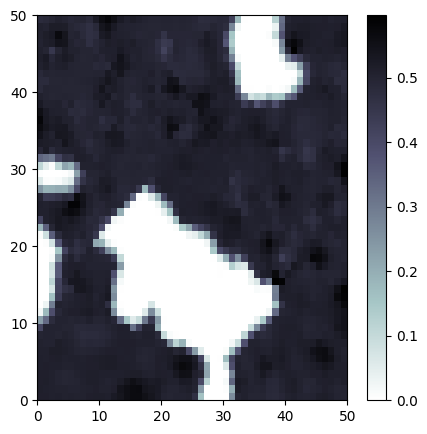

In [75]:
plt.figure(figsize=(5, 5))
plt.pcolor(som0,cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.title("")


In [76]:
a=list(X1.columns)

/var/folders/7_/01r5mr2d3yd6tw5vmc555py40000gn/T/ipykernel_58001/4227833494.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


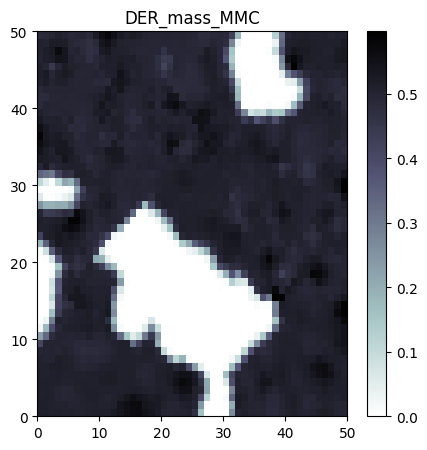

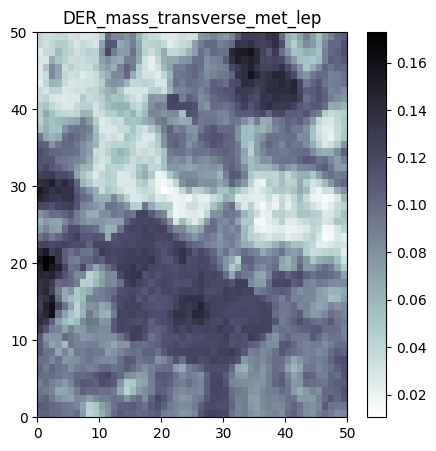

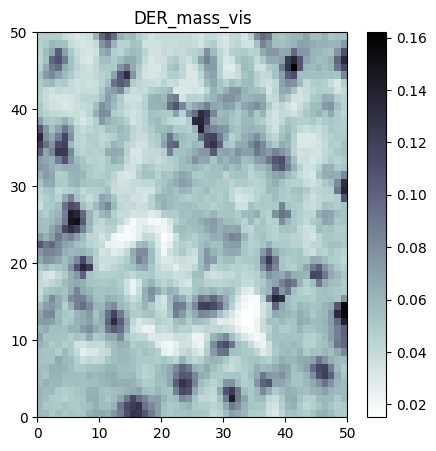

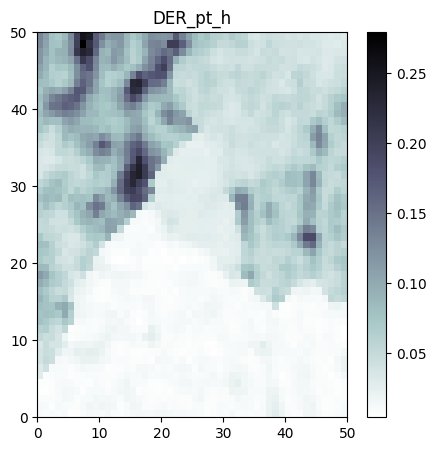

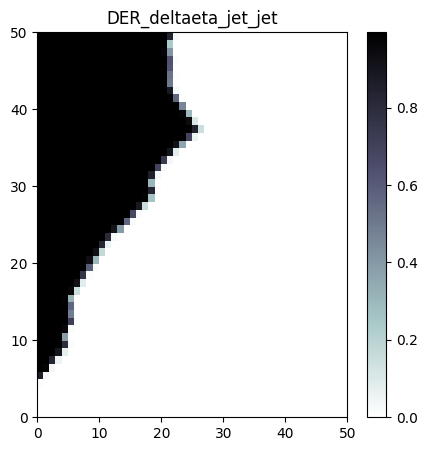

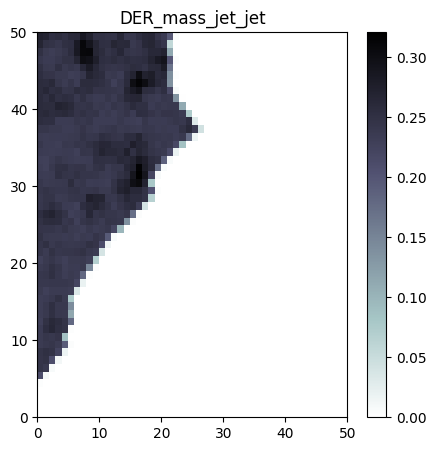

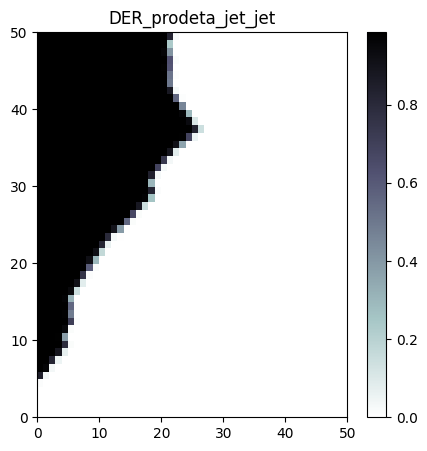

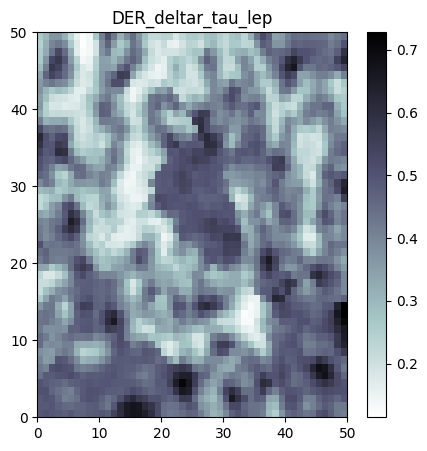

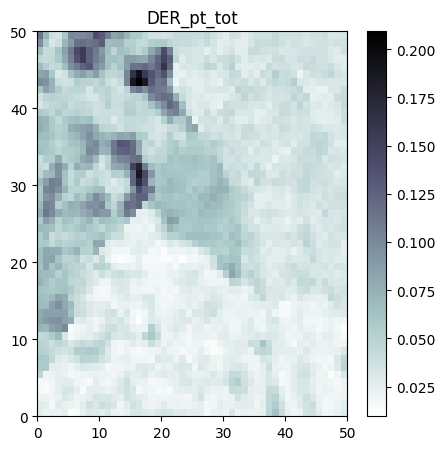

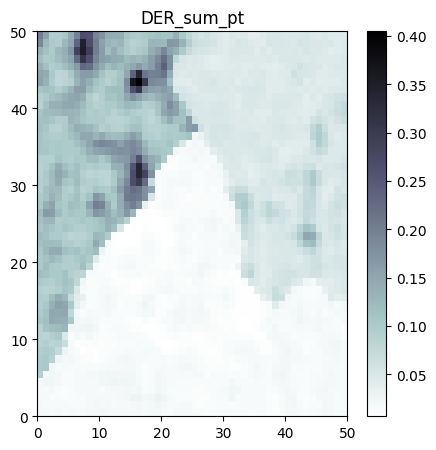

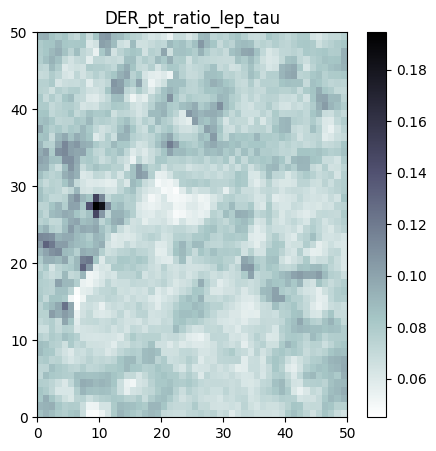

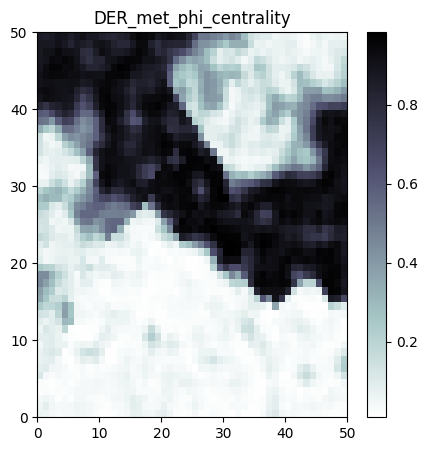

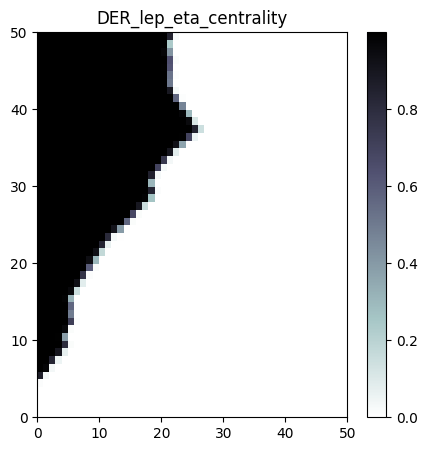

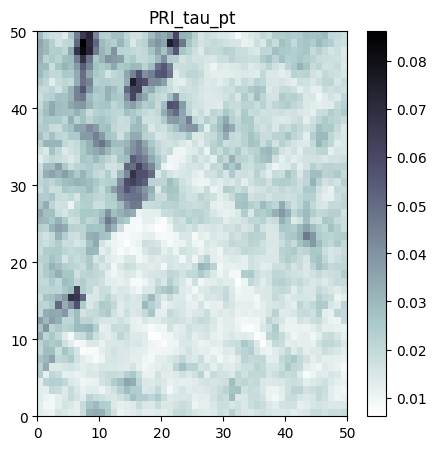

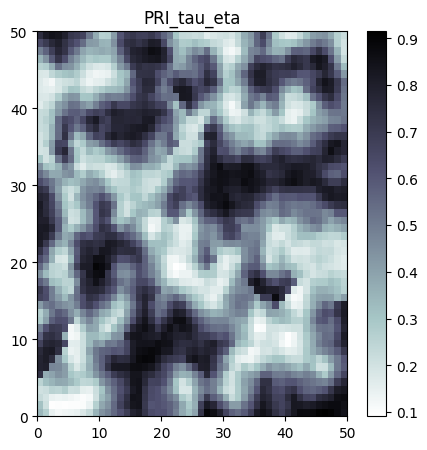

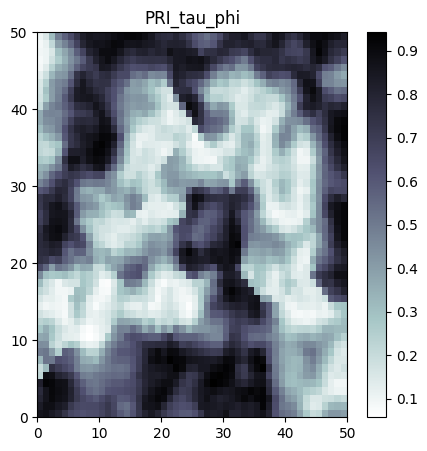

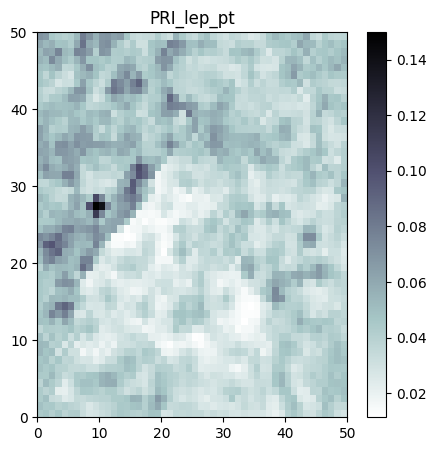

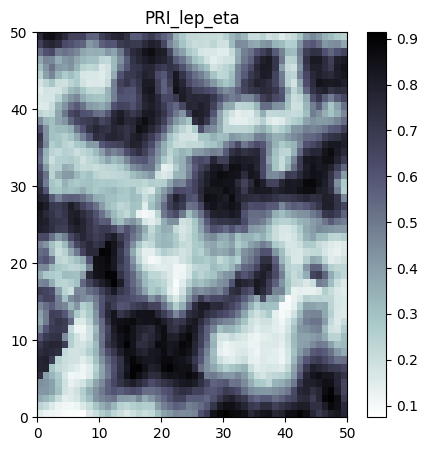

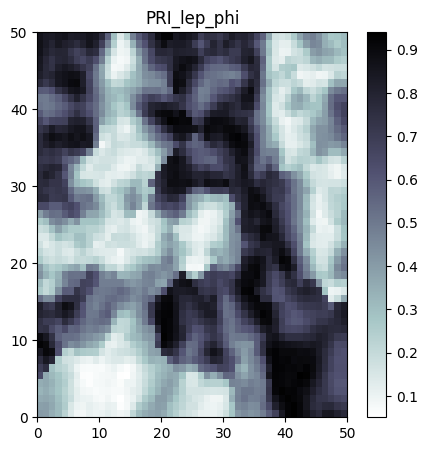

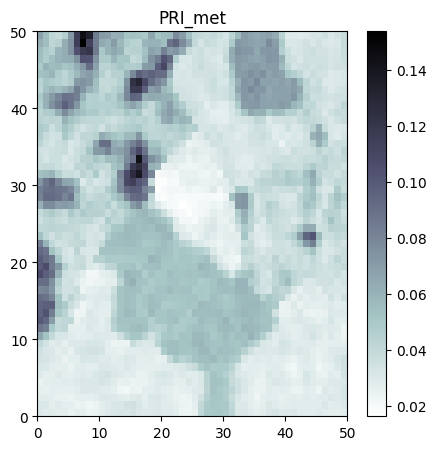

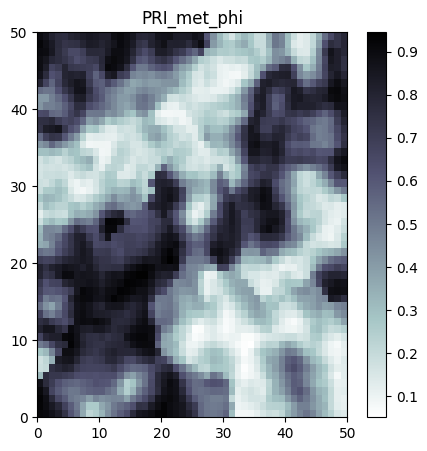

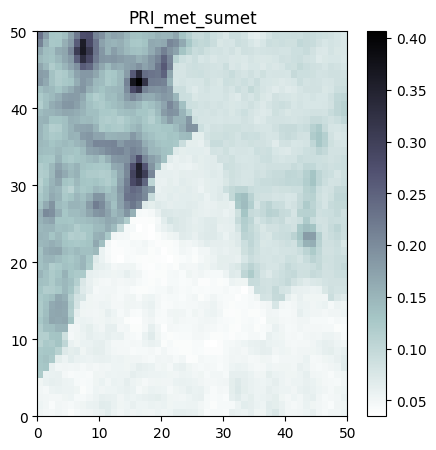

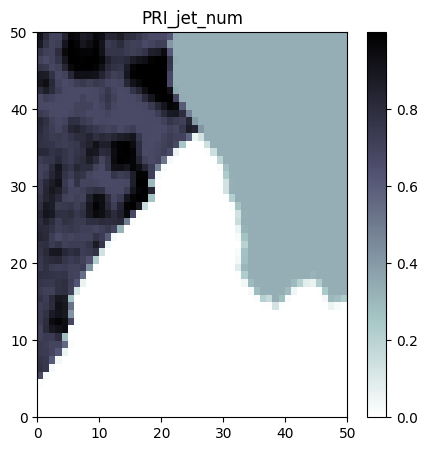

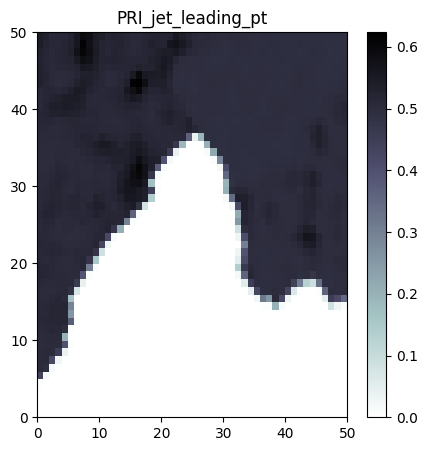

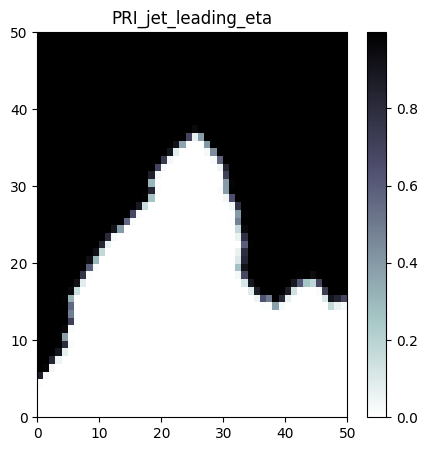

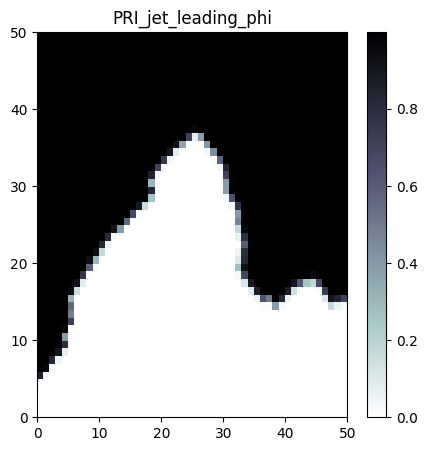

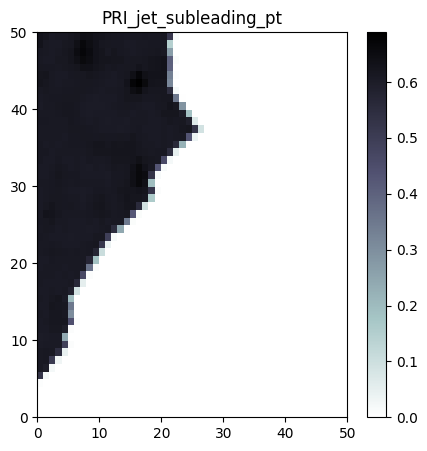

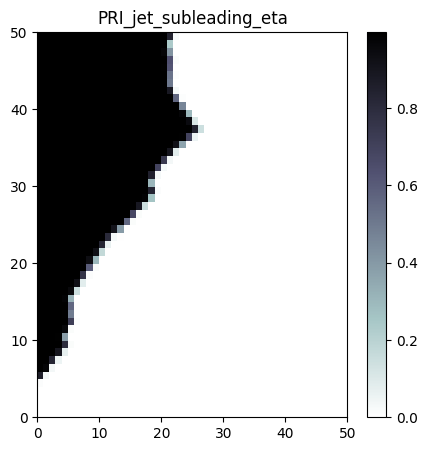

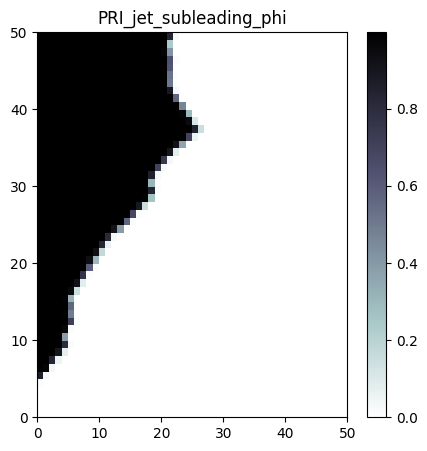

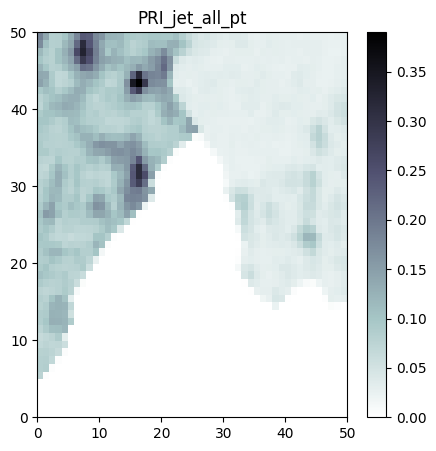

In [77]:
for i in range(len(a)):
    som0 = som[:,:,i]
    #name='/home/mudit/IOP/project/bkg/' + a[i]
    plt.figure(figsize=(5, 5))
    plt.pcolor(som0,cmap='bone_r')  # plotting the distance map as background
    plt.colorbar()
    plt.title(a[i])
   # plt.savefig(name+'_bkg_'+'.png')
    

In [33]:
map_sum_bkg = np.sum(som, axis=2)

In [34]:
map_sum_bkg.shape

(50, 50)

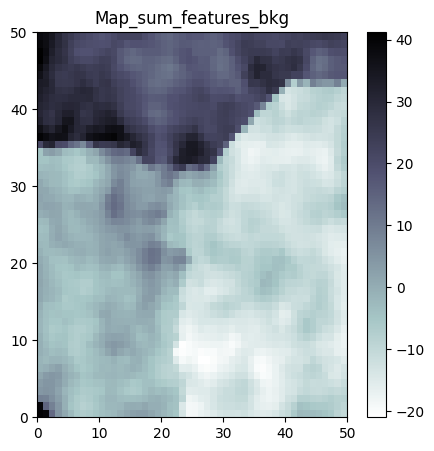

In [35]:
plt.figure(figsize=(5, 5))
plt.pcolor(map_sum_bkg,cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
#name='bkg'
plt.title("Map_sum_features_bkg")
plt.savefig("Map_sum_features_bkg.pdf")


In [41]:
# som_net = map_sum_bkg
som_net =som0

In [37]:
def euc_dist(x,y):
    return abs(x-y)

In [42]:
som_width = 50
som_length = 50

u_matrix = np.zeros((som_width, som_length))

for x in range(0, som_width):
    for y in range(0, som_length):
        neighbour_list = list()
        #Finding the Neighbor indexs for (x, y) and making a list of them.
        for u in range(x-1, x+2):
            if (u < 0 or u > (som_width-1)):
                continue
            for v in range(y-1, y+2):
                if(v < 0 or v > (som_length-1)):
                    continue
                if (u == x and v == y):
                    continue
                neighbour_list.append(np.array([u,v]))
                #print(neighbour_list)

        sum=0
        for idx in neighbour_list:
            #print(som_net[x][y])
            sum += euc_dist(som_net[x][y], som_net[idx[0]][idx[1]])
        
        avg = sum/len(neighbour_list)
        u_matrix[x-1,y-1] = avg

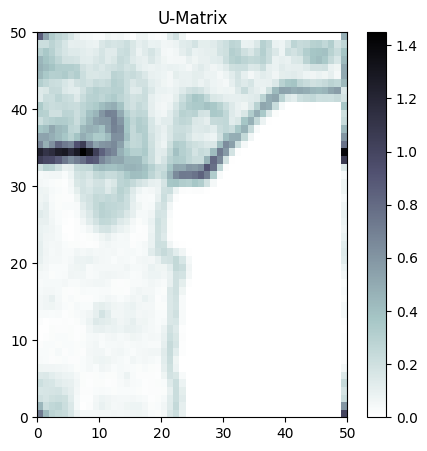

In [44]:
fig = plt.figure(figsize=(5,5))
#plt.title("U Matrix visualization of Iris data using SOM")
plt.pcolor(u_matrix, cmap="bone_r")
plt.title("U-Matrix")
#name='/home/mudit/IOP/project/bkg/'
plt.colorbar()
plt.savefig("U-Matrix_bkg.png")


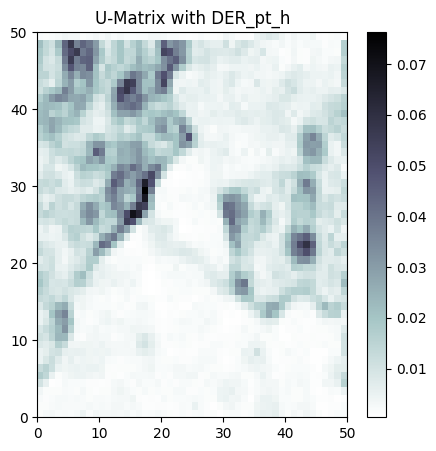

In [112]:
som_width = 50
som_length = 50
som_net1=som[:,:,3]
u_matrix = np.zeros((som_width, som_length))

for x in range(0, som_width):
    for y in range(0, som_length):
        neighbour_list = list()
        #Finding the Neighbor indexs for (x, y) and making a list of them.
        for u in range(x-1, x+2):
            if (u < 0 or u > (som_width-1)):
                continue
            for v in range(y-1, y+2):
                if(v < 0 or v > (som_length-1)):
                    continue
                if (u == x and v == y):
                    continue
                neighbour_list.append(np.array([u,v]))
                #print(neighbour_list)

        sum=0
        for idx in neighbour_list:
            #print(som_net[x][y])
            sum += euc_dist(som_net1[x][y], som_net1[idx[0]][idx[1]])
        
        avg = sum/len(neighbour_list)
        u_matrix[x-1,y-1] = avg

fig = plt.figure(figsize=(5,5))
#plt.title("U Matrix visualization of Iris data using SOM")
plt.pcolor(u_matrix, cmap="bone_r")
plt.title("U-Matrix with DER_pt_h")
#name='/home/mudit/IOP/project/bkg/'
plt.colorbar()
#plt.savefig("U-Matrix_bkg.png")
plt.savefig(f'DER_pt_h_umat.png',bbox_inches='tight')

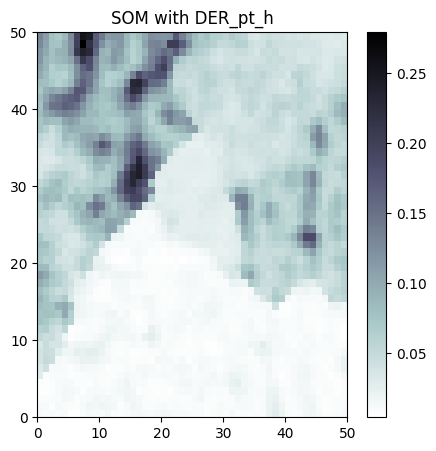

In [113]:
som0 = som[:,:,3]
    #name='/home/mudit/IOP/project/bkg/' + a[i]
plt.figure(figsize=(5, 5))
plt.pcolor(som0,cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.title("SOM with " + a[3])
plt.savefig(f'DER_pt_h_som.png',bbox_inches='tight')

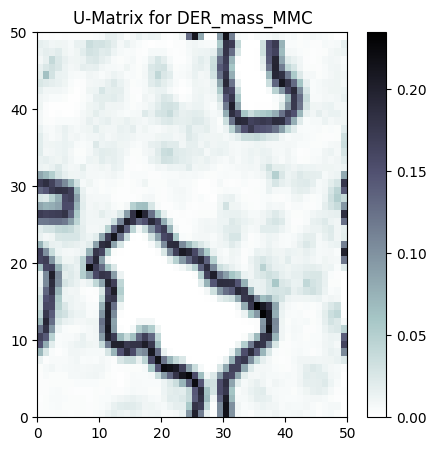

In [111]:
som_width = 50
som_length = 50
som_net1=som[:,:,0]
u_matrix = np.zeros((som_width, som_length))

for x in range(0, som_width):
    for y in range(0, som_length):
        neighbour_list = list()
        #Finding the Neighbor indexs for (x, y) and making a list of them.
        for u in range(x-1, x+2):
            if (u < 0 or u > (som_width-1)):
                continue
            for v in range(y-1, y+2):
                if(v < 0 or v > (som_length-1)):
                    continue
                if (u == x and v == y):
                    continue
                neighbour_list.append(np.array([u,v]))
                #print(neighbour_list)

        sum=0
        for idx in neighbour_list:
            #print(som_net[x][y])
            sum += euc_dist(som_net1[x][y], som_net1[idx[0]][idx[1]])
        
        avg = sum/len(neighbour_list)
        u_matrix[x-1,y-1] = avg

fig = plt.figure(figsize=(5,5))
#plt.title("U Matrix visualization of Iris data using SOM")
plt.pcolor(u_matrix, cmap="bone_r")
plt.title("U-Matrix for DER_mass_MMC")
#name='/home/mudit/IOP/project/bkg/'
plt.colorbar()
#plt.savefig("U-Matrix_bkg.png")
plt.savefig(f'DER_mass_MMC_umat.png',bbox_inches='tight')

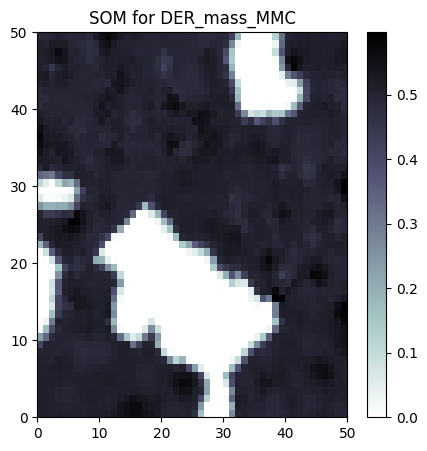

In [110]:
som0 = som[:,:,0]
    #name='/home/mudit/IOP/project/bkg/' + a[i]
plt.figure(figsize=(5, 5))
plt.pcolor(som0,cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.title("SOM for " + a[0])
plt.savefig(f'DER_mass_MMC_som.png',bbox_inches='tight')